# IMPORT ALL REQUIREMENTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## import data csv

In [2]:
df = pd.read_csv("./Data Color.csv")

,Date,Time,Red Freq,Green Freq,Blue Freq,Value
0,8/29/2023,21:55:55,135,160,155,2000
1,8/29/2023,21:56:08,132,157,152,2000
2,8/29/2023,21:56:14,132,156,152,2000
3,8/29/2023,21:56:21,131,155,151,2000
4,8/29/2023,21:56:27,131,155,151,2000
...,...,...,...,...,...,...
204,8/30/2023,22:41:12,95,141,118,100000
205,8/30/2023,22:41:18,101,145,122,100000
206,8/30/2023,22:41:25,110,153,131,100000
207,8/30/2023,22:41:37,88,143,118,100000


In [4]:
df.dtypes

Date          object
Time          object
Red Freq       int64
Green Freq     int64
Blue Freq      int64
Value          int64
dtype: object

# EDA

## Data Preprocessing and Feature Engineering

In [5]:
# drop the date time column

df = df.drop(columns=["Date", "Time"])
df.dropna(inplace=True)

In [6]:
display(df)

,Red Freq,Green Freq,Blue Freq,Value
0,135,160,155,2000
1,132,157,152,2000
2,132,156,152,2000
3,131,155,151,2000
4,131,155,151,2000
...,...,...,...,...
204,95,141,118,100000
205,101,145,122,100000
206,110,153,131,100000
207,88,143,118,100000


In [7]:
df['Value'] = df['Value'].astype(int).astype(str)

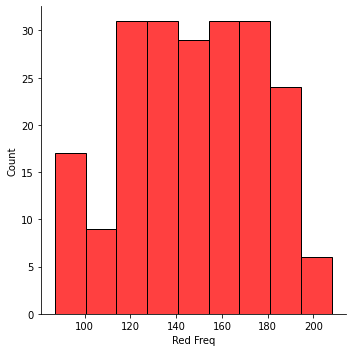

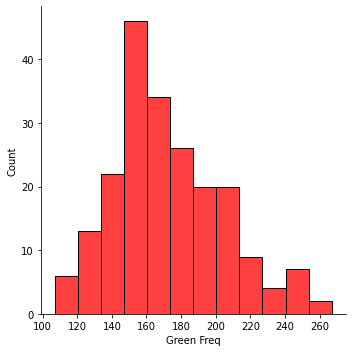

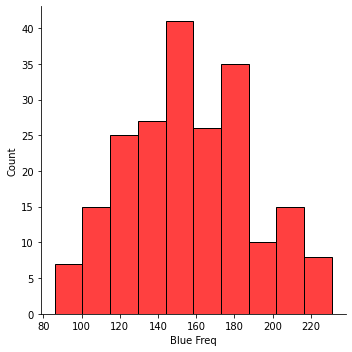

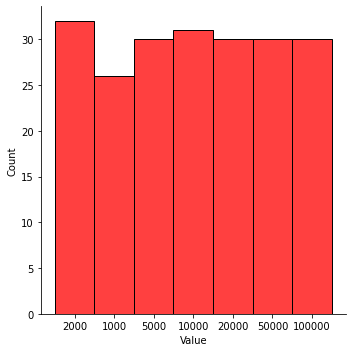

In [8]:
for i in df.columns:
    sns.displot(data=df[i], color="red")

In [9]:
display(df)

,Red Freq,Green Freq,Blue Freq,Value
0,135,160,155,2000
1,132,157,152,2000
2,132,156,152,2000
3,131,155,151,2000
4,131,155,151,2000
...,...,...,...,...
204,95,141,118,100000
205,101,145,122,100000
206,110,153,131,100000
207,88,143,118,100000


In [10]:
## scaling dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [11]:
# memex = MinMaxScaler()
# col = ["Red Freq", "Blue Freq", "Green Freq"]
# df[col] = memex.fit_transform(df[col])
# display(df)

# Modelling

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score




In [13]:
X = df.drop(columns="Value")
y = df["Value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
display(X_train)
display(y_train)

,Red Freq,Green Freq,Blue Freq
150,188,159,118
96,119,137,104
199,98,143,120
68,129,165,166
156,183,151,112
...,...,...,...
106,161,209,157
14,131,150,136
92,147,192,141
179,99,177,147


150     50000
96      10000
199    100000
68       5000
156     50000
        ...  
106     10000
14       2000
92      10000
179    100000
102     10000
Name: Value, Length: 167, dtype: object

In [15]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svc = SVC(kernel="linear", random_state=42)
logistic_regression = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=14)
models = [("Decision Tree",decision_tree), ("Random Forest", random_forest), ("SVC", svc), ("Logistic Regression", logistic_regression), ("KNN", knn) ]

### Training

In [16]:
for i in models:
    i[1].fit(X_train, y_train)

c:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Prediction

In [17]:
for model in models:    
    y_pred = model[1].predict(X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    print(f"{model[0]} f1 score= {f1}")
    print(f"{model[0]} accuracy = {accuracy}")
    print(f"{model[0]} precision = {precision}")
    

Decision Tree f1 score= 0.8426416720534368
Decision Tree accuracy = 0.8333333333333334
Decision Tree precision = 0.8333333333333334
Random Forest f1 score= 1.0
Random Forest accuracy = 1.0
Random Forest precision = 1.0
SVC f1 score= 0.9325396825396824
SVC accuracy = 0.9285714285714286
SVC precision = 0.9285714285714286
Logistic Regression f1 score= 0.8285714285714285
Logistic Regression accuracy = 0.8571428571428571
Logistic Regression precision = 0.8571428571428571
KNN f1 score= 0.9049421477992907
KNN accuracy = 0.8809523809523809
KNN precision = 0.8809523809523809


### Analisis hasil prediksi

Dari hasil prediksi, model decision tree dan random forest memiliki akurasi tertinggi yaitu sekitar 95%

### pemilihan model setelah hasil analisis

In [18]:
model = models[2][1]
model.fit(X, y)


SVC(kernel='linear', random_state=42)

### Import model

In [19]:
import joblib
model_filename = 'model.joblib'
joblib.dump(model, model_filename)

['model.joblib']